In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
from tqdm import tqdm
import pandas as pd
import random
import ast


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\nlp_assignment1\\train.csv') # loading training data
data = []
for index, row in tqdm(df.iterrows(), total=1000):
    data.append(ast.literal_eval(row['tagged_sentence'])) # changing data-type of entries from 'str' to 'list'

47340it [00:13, 3525.58it/s]                                                                                           


In [3]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\nlp_assignment1\\test_small.csv') # loading test data
test_data = {} 
for index, row in tqdm(df.iterrows(), total=1000):
    test_data[row['id']] = ast.literal_eval(row['untagged_sentence']) # changing data-type of entries from 'str' to 'list'

4000it [00:00, 8068.56it/s]                                                                                            


In [4]:
def display_data(sentence_index):
    '''
        Input : 'sentence_index' (int) -> index of a sentence in training data
        Output: None
    '''
    sentence = data[sentence_index]
    print("TOKEN -> TAG")
    print('...')
    for token, tag in sentence:
        print(token, '>', tag)
sentence_index = random.choice(range(len(data)))
display_data(sentence_index)

TOKEN -> TAG
...
So > CS
that > DT
had > HV
been > BE
his > PP
difficulty > NN
. > .


In [5]:
# cell to show the frequency of each distinct (slack or native) present in the training data
from collections import Counter
distinct_tags = []
word_tags = []
def store_tags():
    
    global distinct_tags
    global word_tags
    
    for sent in data:
        word_tags.append(('START','START'))
        for words, tag in sent:
            word_tags.extend([(tag, words)])
        word_tags.append(('END','END'))
    
store_tags()
tags=[]
for tag, words in word_tags:
    tags.append(tag)
distinct_tags=list(set(tags))
count_tags = {}
for tag, count in Counter(tags).items():
    count_tags[tag] = count

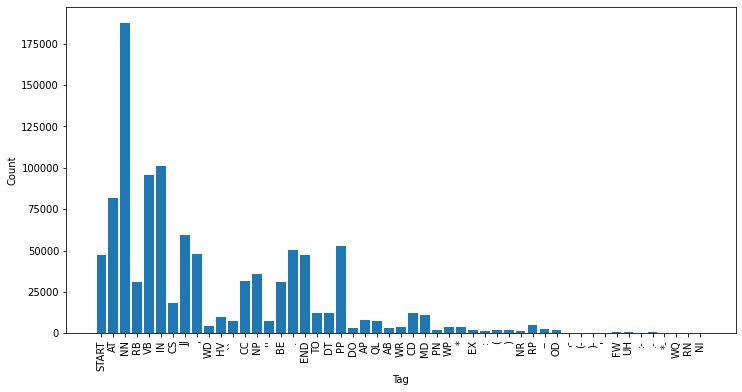

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
plt.bar(range(len(count_tags)), list(count_tags.values()), align='center')
plt.xticks(range(len(count_tags)), list(count_tags.keys()))
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [7]:
submission = {'id': [], 'tagged_sentence' : []} # dictionary to store tag predictions
# NOTE ---> ensure that tagged_sentence's corresponing 'id' is same as 'id' of corresponding 'untagged_sentence' in training data
def store_submission(sent_id, tagged_sentence):
    
    global submission
    submission['id'].append(sent_id)
    submission['tagged_sentence'].append(tagged_sentence)
    
def clear_submission():
    global submission
    submission = {'id': [], 'tagged_sentence' : []}

In [8]:
def hmm_tagger_util(sent_id, untagged_sentence):
    store_submission(sent_id, tagged_sentence)

In [9]:
def memm_tagger_util(sent_id, untagged_sentence):
    store_submission(sent_id, tagged_sentence)

In [10]:
# cell to implement tagger that allots random tags to words in a sentence

def random_tagger_util(sent_id, untagged_sentence):
    if(sent_id in list(submission['id'])):
        return
    tagged_sentence = []
    for word in untagged_sentence:
        tagged_sentence.append((word, random.choice(distinct_tags)))
    store_submission(sent_id, tagged_sentence)
    

In [11]:
for sent_id in tqdm(list(test_data.keys())):
    sent = test_data[sent_id]
    random_tagger_util(sent_id, sent)

100%|███████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 16863.78it/s]


In [12]:
# path_to_directory = '/kaggle/working/'
# pd.DataFrame(submission).to_csv(path_to_directory +' sample_submission.csv', index = False)

In [13]:
import string
from collections import defaultdict

training_data = []
def build_vocab_new(): #fujnction for creating the vocabulary using the training set
    vocab = []
    freqs = defaultdict(int)
    for i in range(len(data)):
        sentence = data[i]
        for token, tag in sentence:
            # Append (token, tag) tuple to training_data
            training_data.append((token, tag))
            freqs[token]+=1
            
    vocab = [k for k, v in freqs.items() if (v>2 and k!='\n')] #check the condition again
    unk_toks = ["--unk--", "--unk_adj--", "--unk_adv--", "--unk_digit--", "--unk_noun--", "--unk_punct--", "--unk_upper--", "--unk_verb--"]
    vocab.extend(unk_toks)
    vocab.append("--n--") #represents end of sentence
    vocab.append(" ") #represents the space character
    vocab = sorted(set(vocab))
#     print(vocab[0:50])
#     print(vocab[-50:])
    return vocab

build_vocab_new()
        

[' ',
 '!',
 '$.03',
 '$1',
 '$1,000',
 '$1,500',
 '$10',
 '$10,000',
 '$100',
 '$135',
 '$14',
 '$15',
 '$15,000',
 '$150',
 '$2',
 '$2,000',
 '$20',
 '$20,000',
 '$200',
 '$25',
 '$25,000',
 '$250',
 '$28',
 '$3,000',
 '$30,000',
 '$300',
 '$4',
 '$40',
 '$400',
 '$45',
 '$450',
 '$5',
 '$5,000',
 '$5,000,000',
 '$50',
 '$500',
 '$500,000',
 '$5000',
 '$600',
 '$7',
 '$700',
 '$75',
 '$750',
 '$800',
 '$900',
 '&',
 "'",
 "''",
 "'48",
 "'50",
 "'52",
 "'61",
 "'em",
 "'im",
 "'round",
 '(',
 ')',
 '**ya',
 '**yb',
 '**yc',
 '**yf',
 '**yl',
 '**yt',
 '**zg',
 ',',
 '-',
 '--',
 '--n--',
 '--unk--',
 '--unk_adj--',
 '--unk_adv--',
 '--unk_digit--',
 '--unk_noun--',
 '--unk_punct--',
 '--unk_upper--',
 '--unk_verb--',
 '.',
 '/',
 '0',
 '0.1',
 '0.3',
 '0.4',
 '0.5',
 '0.8',
 '1',
 "1''",
 '1,000',
 '1,500',
 '1-1/2',
 '1.1',
 '1.5',
 '1.8',
 '1/2',
 "1/2''",
 '1/4',
 "1/4''",
 "1/8''",
 '10',
 '10%',
 "10''",
 '10,000',
 '10-year',
 '10-year-old',
 '100',
 '100%',
 '100,000',
 '1000'

In [14]:
# vocab: dictionary that has the index of the corresponding words-each word in the vocab is linked to an integer
vocab = {} 

# Get the index of the corresponding words. 
for i, word in enumerate(sorted(build_vocab_new())): 
    vocab[word] = i       
    
print("Vocabulary dictionary, key is the word, value is a unique integer")
cnt = 0
for k,v in vocab.items():
    print(f"{k}:{v}")
    cnt += 1
    if cnt > 20:
        break

Vocabulary dictionary, key is the word, value is a unique integer
 :0
!:1
$.03:2
$1:3
$1,000:4
$1,500:5
$10:6
$10,000:7
$100:8
$135:9
$14:10
$15:11
$15,000:12
$150:13
$2:14
$2,000:15
$20:16
$20,000:17
$200:18
$25:19
$25,000:20


In [15]:
import string
# punctuation characters
punct = set(string.punctuation)

# morphology rules used to assign unknown word tokens
noun_suffix = ["action", "age", "ance", "cy", "dom", "ee", "ence", "er", "hood", "ion", "ism", "ist", "ity", "ling", "ment", "ness", "or", "ry", "scape", "ship", "ty"]
verb_suffix = ["ate", "ify", "ise", "ize"]
adj_suffix = ["able", "ese", "ful", "i", "ian", "ible", "ic", "ish", "ive", "less", "ly", "ous"]
adv_suffix = ["ward", "wards", "wise"]

def assign_unk(tok):
    # Digits
    if any(char.isdigit() for char in tok):
        return "--unk_digit--"

    # Punctuation
    elif any(char in punct for char in tok):
        return "--unk_punct--"

    # Upper-case
    elif any(char.isupper() for char in tok):
        return "--unk_upper--"

    # Nouns
    elif any(tok.endswith(suffix) for suffix in noun_suffix):
        return "--unk_noun--"

    # Verbs
    elif any(tok.endswith(suffix) for suffix in verb_suffix):
        return "--unk_verb--"

    # Adjectives
    elif any(tok.endswith(suffix) for suffix in adj_suffix):
        return "--unk_adj--"

    # Adverbs
    elif any(tok.endswith(suffix) for suffix in adv_suffix):
        return "--unk_adv--"

    return "--unk--"

In [16]:
#function for creating dictionaries for storing the count of tags, words to be used for finding probabilities
def create_dictionaries(training_data, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)

    prev_tag = '--s--'
    tag_counts[prev_tag] = 1
    for token, tag in training_data:
        if(token not in vocab):
            token = assign_unk(token)
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, tok)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
            
    return emission_counts, transition_counts, tag_counts


In [17]:
# for creating transition and emission matrix 

def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)

    # initialize the transition matrix 'A'
    A = np.zeros((num_tags, num_tags))

    # get the unique transition tuples (prev POS, cur POS)
    trans_keys = set(transition_counts.keys())

    for i in range(num_tags):
        for j in range(num_tags):
            # initialize the count of (prev POS, cur POS)
            count = 0

            key = (all_tags[i], all_tags[j])
            if key in transition_counts:
                count = transition_counts[key]
            count_prev_tag = tag_counts[all_tags[i]]

            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)

    return A

def create_emission_matrix(alpha, tag_counts, emission_counts, vocab):
    num_tags = len(tag_counts)
    all_tags = sorted(tag_counts.keys())
    num_words = len(vocab)

    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))
    for i in range(num_tags):
        for j in range(num_words):
            count = 0

            key =  (all_tags[i], vocab2idx[j])
            if key in emission_counts:
                count = emission_counts[key]
            count_tag = tag_counts[all_tags[i]]

            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B


In [18]:
# for verterbi algorithm

def initialize(A, B, tag_counts, vocab, states, prep_tokens):
    num_tags = len(tag_counts)
    best_probs = np.zeros((num_tags, len(prep_tokens)))
    best_paths = np.zeros((num_tags, len(prep_tokens)), dtype=int)
    s_idx = states.index('--s--')

    for i in range(num_tags):
        if A[s_idx, i] == 0:
            best_probs[i, 0] = float('-inf')
        else:
            best_probs[i,0] = np.log(A[s_idx, i]) + 
            if prep_tokens[0] is in vocab:
                best_probs[i,0]+=np.log(B[i, vocab[prep_tokens[0]]])

    return best_probs, best_paths

def viterbi_forward(A, B, prep_tokens, best_probs, best_paths, vocab):
    num_tags = best_probs.shape[0]
    for i in range(1, len(prep_tokens)):
        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None

            for k in range(num_tags):
                prob = best_probs[k,i-1]+np.log(A[k,j])
                if prep_tokens[i] is in vocab:
                    prob+=np.log(B[j,vocab[prep_tokens[i]]])
                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k
            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i
    return best_probs, best_paths


def viterbi_backward(best_probs, best_paths, states):
    m = best_paths.shape[1]
    z = [None] * m
    num_tags = best_probs.shape[0]

    best_prob_for_last_word = float('-inf')
    pred = [None] * m

    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k
    pred[m - 1] = states[z[m - 1]]

    for i in range(m-1, -1, -1):
        pos_tag_for_word_i = z[i]
        z[i - 1] = best_paths[pos_tag_for_word_i,i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [19]:
def hmm_tagger_util(sent_id, untagged_sentence):
    emission_counts, transition_counts, tag_counts = create_dictionaries(training_data, vocab)
    states = sorted(tag_counts.keys())
#     print(f"Number of POS tags (number of 'states'): {len(states)}")
#     print("View these POS tags (states)")
#     print(states)
    alpha = 0.001 #need to tune it
    A = create_transition_matrix(alpha, tag_counts, transition_counts)
    B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocab))
    best_probs, best_paths = initialize(states, tag_counts, A, B, prep, vocab)
    best_probs, best_paths = viterbi_forward(A, B, prep, best_probs, best_paths, vocab)
    pred = viterbi_backward(best_probs, best_paths, untagged_sentence, states) #prep is the one unatgged sentence from test data set
    m=len(pred)
    #pred is the list of tags for untagged_sentence
    tagged_sentence_pred = []
    for i in range(len(pred)):
        taggeg_sentence_new.append((untagged_sentence[i],pred[i]))
        
#     print('The prediction for pred[-7:m-1] is: \n', prep[-7:m-1], "\n", pred[-7:m-1], "\n")
#     print('The prediction for pred[0:8] is: \n', pred[0:7], "\n", untagged_sentence[0:7])
    store_submission(sent_id, tagged_sentence_new)

In [ ]:
for id_, sentence in test_data.items():
    hmm_tagger_util(id_, sentence)

In [20]:
# Memm tagger

In [21]:
#Code for feature extraction

import sys
from collections import Counter
import time

features_file = "feature_file"

UNK_TOKEN = 'UNK'
START_TOKEN = '<START>'
START_TAG = '<S>'
END_TOKEN = '<END>'


def extract(sent, i, last_tags, rare_or_unknown):

    _sent = [START_TOKEN, START_TOKEN] + sent + [END_TOKEN, END_TOKEN]
    _i = i + 2

    word = _sent[_i]

    features = dict(prev_prev_t=last_tags[0],
                    prev_t=last_tags[1],
                    word=word if not rare_or_unknown else UNK_TOKEN,
                    pref1=word[:1],
                    pref2='' if len(word) < 2 else word[:2],
                    pref3='' if len(word) < 3 else word[:3],
                    pref4='' if len(word) < 4 else word[:4],
                    pref5='' if len(word) < 5 else word[:5],
                    pref6='' if len(word) < 6 else word[:6],
                    suff6='' if len(word) < 6 else word[-6:],
                    suff5='' if len(word) < 5 else word[-5:],
                    suff4='' if len(word) < 4 else word[-4:],
                    suff3='' if len(word) < 3 else word[-3:],
                    suff2='' if len(word) < 2 else word[-2:],
                    suff1=word[-1:],
                    prev_prev_w=_sent[_i - 2],
                    prev_w=_sent[_i - 1],
                    next_w=_sent[_i + 1],
                    next_next_w=_sent[_i + 2])

    return features


def identify_rare_words(words, num_occurrences=1):

    rare = set()

    # Count the number of occurrences of each word in the training set.
    counter = Counter(words)

    # Collect the words in the training set that appear only once and consider them as rare wards.
    for word, amount in counter.items():
        if amount <= num_occurrences:
            rare.add(word)

    return rare

In [22]:
print(data[0])

[('The', 'AT'), ('jury', 'NN'), ('further', 'RB'), ('said', 'VB'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NN'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN'), ('Executive', 'JJ'), ('Committee', 'NN'), (',', ','), ('which', 'WD'), ('had', 'HV'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VB'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NN'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN'), ('of', 'IN'), ('Atlanta', 'NP'), ("''", "''"), ('for', 'IN'), ('the', 'AT'), ('manner', 'NN'), ('in', 'IN'), ('which', 'WD'), ('the', 'AT'), ('election', 'NN'), ('was', 'BE'), ('conducted', 'VB'), ('.', '.')]


In [23]:
start_time = time.time()

corpus = data

# Parse the input sentences and identify the rare words.
train_words = []
for i in range(len(data)):
    sentence = data[i]
    for token, tag in sentence:
        train_words.append(token)
            
rare_words = identify_rare_words(train_words)

with open(features_file, "w") as features_file:
    for i in range(len(data)):
        sentence = data[i]

        # Parse the current sentence to words and tags.
        tuples = sentence
        words, tags = [pair[0] for pair in tuples], [START_TAG, START_TAG] + [pair[1] for pair in tuples]

        # For each word in the sentence.
        for idx in range(len(tuples)):

            # Update the last two predicted tags.
            last_two_tags = tags[idx], tags[idx + 1]

            # Extract the word's features.
            features = extract(words, idx, last_two_tags, words[idx] in rare_words)

            # Write the word's features to the features file.
            features_file.write(
                tags[idx + 2] + ' ' + ' '.join([key + "=" + str(val) for key, val in features.items()]) + "\n")

passed_time = time.time() - start_time
print("Feature Extraction finished in %.2f seconds" % passed_time)

Feature Extraction finished in 21.06 seconds


In [24]:
import pickle
import sys
import time
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

features_file = "feature_file"
model_file = "model_file"

words_set = set()


def load_features_file():

    words_features, tags = [], []

    # Fetch the training set's words features.
    with open(features_file, "r", encoding="utf-8") as featuresFile:
        features = featuresFile.readlines()

    # For each line in the features file.
    for line in features:

        # Parse the line into the word's features.
        features = line.strip().split(' ')
        tags.append(features.pop(0))

        # Save the word's features in a dictionary.
        featuresDict = dict([tuple(pair.split('=', 1)) for pair in features])
        words_set.add(featuresDict['word'])
        words_features.append(featuresDict)

    return words_features, tags


def convert_features_to_vectors(features):

    v = DictVectorizer()

    # Convert all words features into feature vectors.
    feature_vectors = v.fit_transform(features)

    # Save the DictVectorizer object to a file for using later in the prediction.
    save_to_file(v)

    return feature_vectors


def save_to_file(feature_map):

    # Save the DictVectorizer object and the set of  words appeared on the training set to a file.
    with open('feature_map_file', 'wb') as file:
        pickle.dump(feature_map, file)
        pickle.dump(words_set, file)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
start_time = time.time()

# Load all features from the features file and convert them into feature vectors.
features_per_line, tags = load_features_file()
feature_vectors = convert_features_to_vectors(features_per_line)

# Logistic Regression classifier.
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='l2', tol=1e-4, random_state=0,
                             max_iter=1200) #need to tune them

# Train the classifier.
log_reg.fit(feature_vectors, tags)

# Save the trained model to model_file.
pickle.dump(log_reg, open(model_file, 'wb'))

passed_time = time.time() - start_time
print("Training finished in %.2f minutes" % (passed_time / 60))

In [ ]:
import pickle
import time

def memm_tag_sentence(untagged_sentence, model_file_name="model_file", feature_map_file="feature_map_file"):
    UNK_TOKEN = 'UNK'
    START_TOKEN = '<START>'
    START_TAG = '<S>'
    END_TOKEN = '<END>'

    start_time = time.time()

    # Load the DictVectorizer object and the training set words.
    with open(feature_map_file, 'rb') as file:
        v = pickle.load(file)
        train_words = pickle.load(file)

    # Load the trained Logistic Regression model.
    log_reg = pickle.load(open(model_file_name, 'rb'))

    # Initialize last two tags for the sentence.
    last_two_tags = [(START_TAG, START_TAG)]

    # Initialize tagged sentence
    tagged_sentence = []

    # Iterate over each word in the untagged sentence
    for i, word in enumerate(untagged_sentence):
        # Extract features for the current word
        features = extract(untagged_sentence, i, last_two_tags[0], not word in train_words)

        # Convert features into a feature vector
        feature_vector = v.transform([features])

        # Predict the tag for the current word
        pred_tag = log_reg.predict(feature_vector)[0]

        # Append (word, tag) tuple to the tagged sentence
        tagged_sentence.append((word, pred_tag))

        # Update last two tags for next iteration
        last_two_tags = (last_two_tags[1], pred_tag)

    passed_time = time.time() - start_time
    print("Prediction finished in %.2f seconds" % passed_time)

    return tagged_sentence

# # Usage example:
# test_data = ["This", "is", "an", "example", "sentence"]
# tagged_result = tag_sentence(test_data)
# print(tagged_result)


In [ ]:
def memm_tagger_util(sent_id, untagged_sentence):
    memm_tag_sentence(untagged_sentence, "model_file", "feature_map_file")
    store_submission(sent_id, tagged_sentence)

In [ ]:
for id_, sentence in test_data.items():
    memm_tagger_util(id_, sentence)

In [ ]:
path_to_directory = '/kaggle/working/'
pd.DataFrame(submission).to_csv(path_to_directory +' sample_submission.csv', index = False)